In [1]:
import pandas as pd
from pathlib import Path
import glob
from collections import Counter
from multiprocessing.dummy import Pool

In [2]:
# PC
# folder = r"Z:\Screen_Time_Measure_Development\SNAP_IT\YOLO_Training\Labelled_Data"

# Mac
folder = r"/Volumes/M&B/Screen_Time_Measure_Development/SNAP_IT/YOLO_Training/Labelled_Data"

files = glob.glob(folder + "//*image*.txt")

In [3]:
with open(folder + "//classes.txt", "r") as f:
    classes = [line.strip("\n") for line in f.readlines()]

In [4]:
def read_txt(file):
    with open(file, "r") as f:
        return Counter(list(map(int, f.read().split()[::5])))

In [5]:
images = pd.DataFrame(data=classes,columns=["label"])
images = images.reindex(columns = ["label","objects","images"])
images.fillna(0, inplace=True)

with Pool() as pool:
    results = pool.map(read_txt, files)
for codes in results:
    for key in codes:
        images.loc[key,"objects"] += codes[key]
        images.loc[key,"images"] += 1

<AxesSubplot:xlabel='label'>

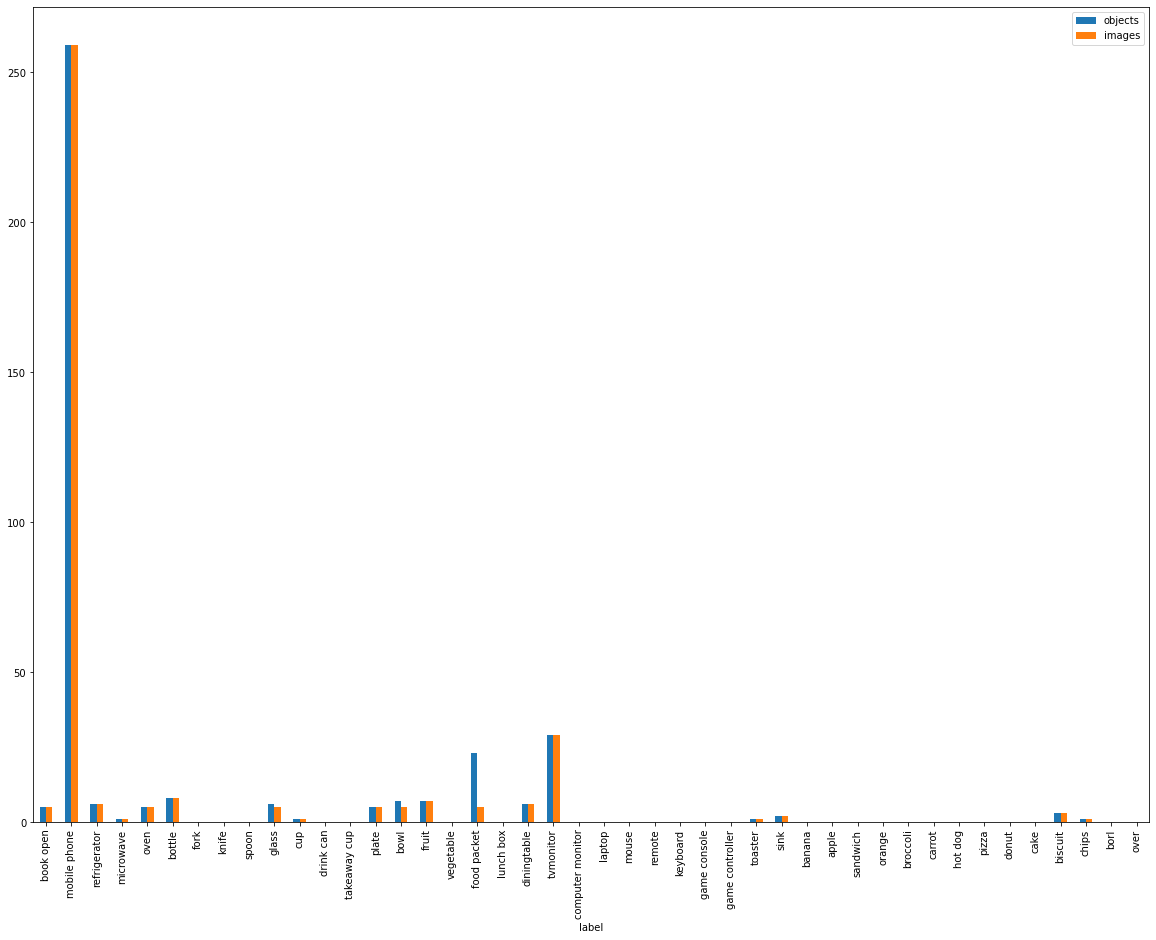

In [7]:
images.plot(kind="bar",figsize=(20,15),x="label")